In [245]:
## 수작업 콘벌루션 ##

import sys
import numpy as np
import cv2

padding_size = 0
    
src = np.array([[2,2,2,2,2,1,1,1],[2,2,2,2,2,1,1,1],[2,2,2,2,2,1,1,1], [2,2,2,2,2,1,1,1],
                [2,2,2,9,9,9,9,9], [2,2,2,9,9,9,9,9], [2,2,2,9,9,9,9,9], [2,2,2,9,9,9,9,9]])
kernel = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) 


src = cv2.copyMakeBorder(src,  padding_size, padding_size, padding_size, padding_size, borderType =None)   ## padding (좌,우, 상,하)
src = src.astype(np.int16)  ## opencv 활용하려면 uint8 타입으로 변경해줘야함

kernel_size = kernel.shape

window_size = int((kernel_size[0] -1) / 2)
output_array=np.zeros((int(src.shape[0]-window_size*2), int(src.shape[1]-window_size*2)))
print(output_array.shape, src, window_size,src.shape, sep='\n')


for i in range(window_size, src.shape[0]-window_size):           
    for j in range(window_size, src.shape[1]-window_size):   ## src.shape[1]은 열의 길이
        core = [i, j]
        selected_array = src[i-window_size:i+window_size+1, j-window_size:j+window_size+1]
#         print(selected_array)
        result = np.sum(selected_array*kernel)
        print(result, '({},{})'.format(i,j))
        output_array[i-window_size,j-window_size] = result
    
print(output_array)

(6, 6)
[[2 2 2 2 2 1 1 1]
 [2 2 2 2 2 1 1 1]
 [2 2 2 2 2 1 1 1]
 [2 2 2 2 2 1 1 1]
 [2 2 2 9 9 9 9 9]
 [2 2 2 9 9 9 9 9]
 [2 2 2 9 9 9 9 9]
 [2 2 2 9 9 9 9 9]]
1
(8, 8)
0 (1,1)
0 (1,2)
0 (1,3)
-3 (1,4)
-3 (1,5)
0 (1,6)
0 (2,1)
0 (2,2)
0 (2,3)
-3 (2,4)
-3 (2,5)
0 (2,6)
0 (3,1)
7 (3,2)
7 (3,3)
-2 (3,4)
-2 (3,5)
0 (3,6)
0 (4,1)
14 (4,2)
14 (4,3)
-1 (4,4)
-1 (4,5)
0 (4,6)
0 (5,1)
21 (5,2)
21 (5,3)
0 (5,4)
0 (5,5)
0 (5,6)
0 (6,1)
21 (6,2)
21 (6,3)
0 (6,4)
0 (6,5)
0 (6,6)
[[ 0.  0.  0. -3. -3.  0.]
 [ 0.  0.  0. -3. -3.  0.]
 [ 0.  7.  7. -2. -2.  0.]
 [ 0. 14. 14. -1. -1.  0.]
 [ 0. 21. 21.  0.  0.  0.]
 [ 0. 21. 21.  0.  0.  0.]]


In [28]:
### 수작업 콘벌루션, 함수로 생성 ###


import sys
import numpy as np
import cv2


def convolution_natural(src,  padding_size, kernel, bias = 0):

 
    src = cv2.copyMakeBorder(src,  padding_size, padding_size, padding_size, padding_size, borderType =None)   ## padding (좌,우, 상,하)
    src = src.astype(np.int16)  ## opencv 활용하려면 uint8 타입으로 변경해줘야함
    print(src)
    kernel_size = kernel.shape  ## 커널의 크기 (3,3), (5,5)

    window_size = int((kernel_size[0] -1) / 2)  ## 커널의 반지름 (3,3)이면 1, (5,5)이면 2
    
    output_array=np.zeros((int(src.shape[0]-window_size*2), int(src.shape[1]-window_size*2)))

    for i in range(window_size, src.shape[0]-window_size):           
        for j in range(window_size, src.shape[1]-window_size):   ## src.shape[1]은 열의 길이
            
            ## (i,j)를 중심으로 한 행렬을 만든다.
            selected_array = src[i-window_size:i+window_size+1, j-window_size:j+window_size+1]

            ## 컨벌루션 연산
            result = np.sum(selected_array*kernel) + bias  

            ## 연산한 값을 출력용 행렬에 대입
            output_array[i-window_size,j-window_size] = result
            
    print(output_array)
    return output_array






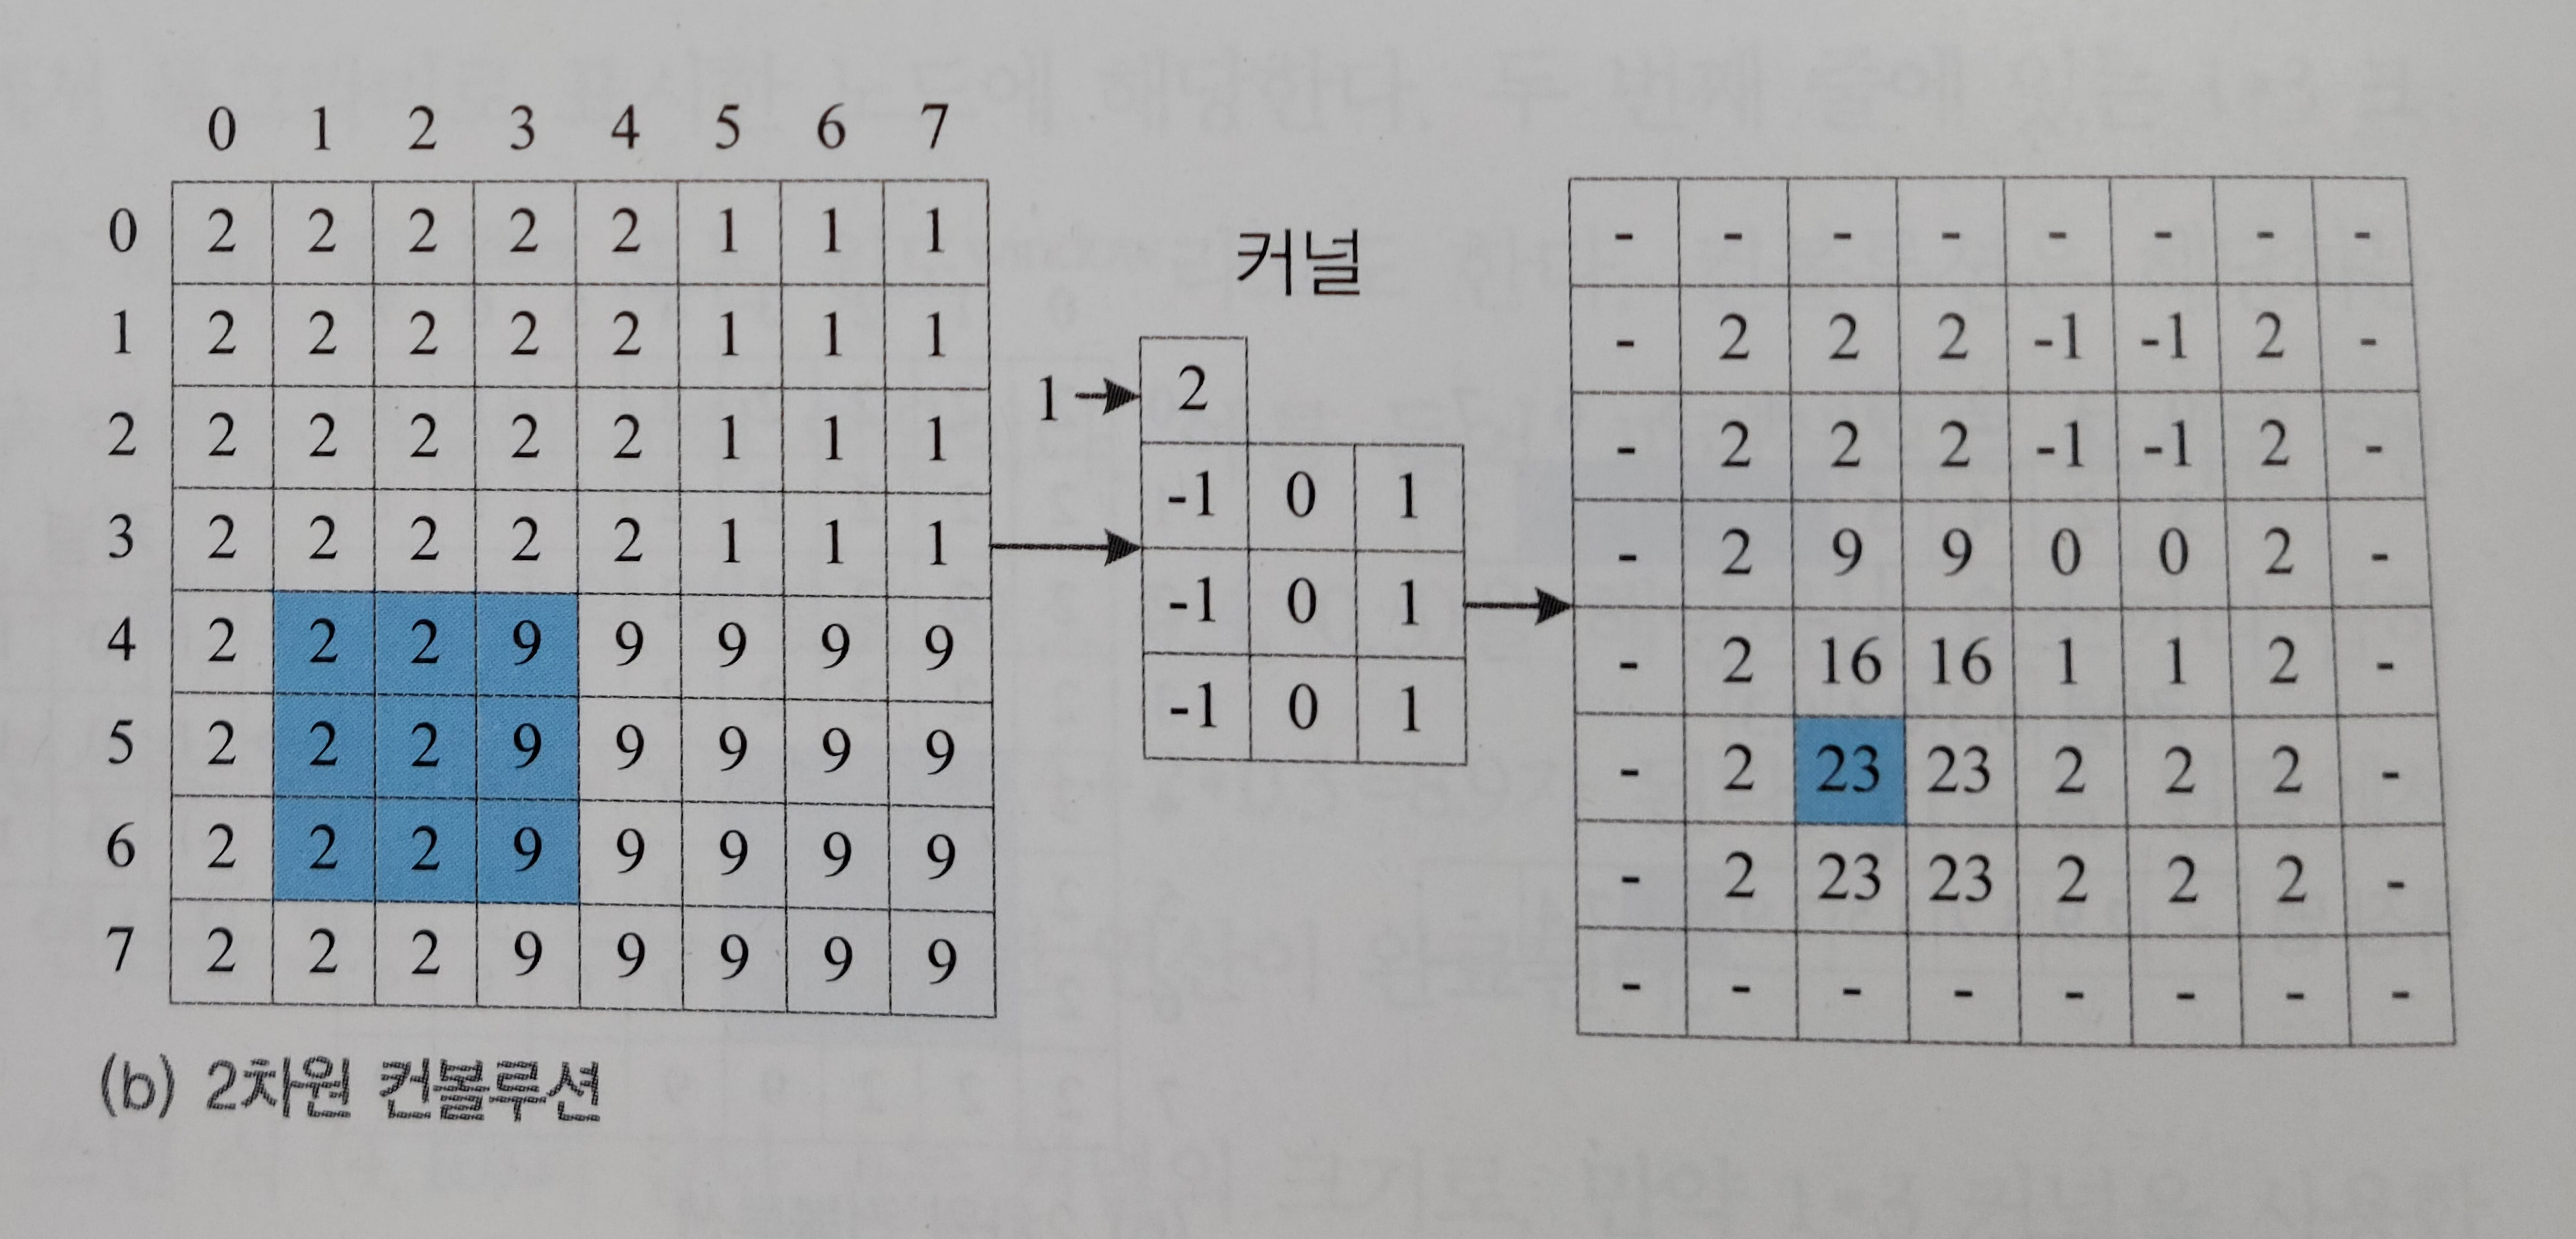

In [268]:
# 위의 그림 계산
padding_size = 0
src = np.array([[2,2,2,2,2,1,1,1],[2,2,2,2,2,1,1,1],[2,2,2,2,2,1,1,1], [2,2,2,2,2,1,1,1],
                [2,2,2,9,9,9,9,9], [2,2,2,9,9,9,9,9], [2,2,2,9,9,9,9,9], [2,2,2,9,9,9,9,9]])
kernel = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) 

convolution_natural(src, 0, kernel, 2)


[[2 2 2 2 2 1 1 1]
 [2 2 2 2 2 1 1 1]
 [2 2 2 2 2 1 1 1]
 [2 2 2 2 2 1 1 1]
 [2 2 2 9 9 9 9 9]
 [2 2 2 9 9 9 9 9]
 [2 2 2 9 9 9 9 9]
 [2 2 2 9 9 9 9 9]]
[[ 2.  2.  2. -1. -1.  2.]
 [ 2.  2.  2. -1. -1.  2.]
 [ 2.  9.  9.  0.  0.  2.]
 [ 2. 16. 16.  1.  1.  2.]
 [ 2. 23. 23.  2.  2.  2.]
 [ 2. 23. 23.  2.  2.  2.]]


array([[ 2.,  2.,  2., -1., -1.,  2.],
       [ 2.,  2.,  2., -1., -1.,  2.],
       [ 2.,  9.,  9.,  0.,  0.,  2.],
       [ 2., 16., 16.,  1.,  1.,  2.],
       [ 2., 23., 23.,  2.,  2.,  2.],
       [ 2., 23., 23.,  2.,  2.,  2.]])

In [267]:
### 3채널 연산 - 4-8번 ###
# 위 그림에 대해 [[-1,-1,1],[0,0,0],[1,1,1]]로 필터를 바꾸어 적용해보자.


src = np.array([[2,2,2,2,2,1,1,1],[2,2,2,2,2,1,1,1],[2,2,2,2,2,1,1,1], [2,2,2,2,2,1,1,1],
                [2,2,2,9,9,9,9,9], [2,2,2,9,9,9,9,9], [2,2,2,9,9,9,9,9], [2,2,2,9,9,9,9,9]])

kernel = np.array([[-1,-1,-1],[0,0,0],[1,1,1]]) 

a = convolution_natural(src, 1, kernel, 0.5)
a

[[0 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 1 1 1 0]
 [0 2 2 2 2 2 1 1 1 0]
 [0 2 2 2 2 2 1 1 1 0]
 [0 2 2 2 2 2 1 1 1 0]
 [0 2 2 2 9 9 9 9 9 0]
 [0 2 2 2 9 9 9 9 9 0]
 [0 2 2 2 9 9 9 9 9 0]
 [0 2 2 2 9 9 9 9 9 0]
 [0 0 0 0 0 0 0 0 0 0]]
[[  4.5   6.5   6.5   6.5   5.5   4.5   3.5   2.5]
 [  0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5]
 [  0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5]
 [  0.5   0.5   7.5  14.5  22.5  23.5  24.5  16.5]
 [  0.5   0.5   7.5  14.5  22.5  23.5  24.5  16.5]
 [  0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5]
 [  0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5]
 [ -3.5  -5.5 -12.5 -19.5 -26.5 -26.5 -26.5 -17.5]]


array([[  4.5,   6.5,   6.5,   6.5,   5.5,   4.5,   3.5,   2.5],
       [  0.5,   0.5,   0.5,   0.5,   0.5,   0.5,   0.5,   0.5],
       [  0.5,   0.5,   0.5,   0.5,   0.5,   0.5,   0.5,   0.5],
       [  0.5,   0.5,   7.5,  14.5,  22.5,  23.5,  24.5,  16.5],
       [  0.5,   0.5,   7.5,  14.5,  22.5,  23.5,  24.5,  16.5],
       [  0.5,   0.5,   0.5,   0.5,   0.5,   0.5,   0.5,   0.5],
       [  0.5,   0.5,   0.5,   0.5,   0.5,   0.5,   0.5,   0.5],
       [ -3.5,  -5.5, -12.5, -19.5, -26.5, -26.5, -26.5, -17.5]])

# 4-7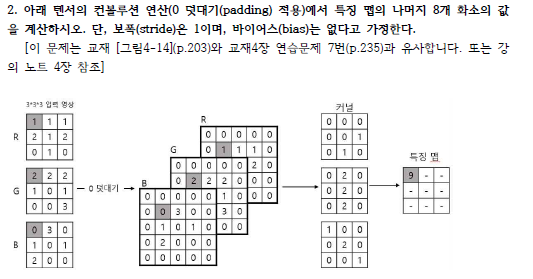

In [253]:
### 3채널 연산 - 4-7번 ###
src = np.array([[1,1,1],[2,1,2],[0,1,0]])
kernel = np.array([[0,0,0],[0,0,1],[0,1,0]]) 
a = convolution_natural(src, 1, kernel)

src = np.array([[2,2,2],[1,0,1],[0,0,3]])
kernel = np.array([[0,2,0],[0,2,0],[0,2,0]]) 
b = convolution_natural(src, 1, kernel)

src = np.array([[0,3,0],[1,0,1],[2,0,0]])
kernel = np.array([[1,0,0],[0,2,0],[0,0,1]]) 
c = convolution_natural(src, 1, kernel)

a+b+c

[[3. 2. 2.]
 [1. 3. 0.]
 [1. 0. 0.]]
[[ 6.  4.  6.]
 [ 6.  4. 12.]
 [ 2.  0.  8.]]
[[0. 7. 0.]
 [2. 0. 5.]
 [4. 1. 0.]]


array([[ 9., 13.,  8.],
       [ 9.,  7., 17.],
       [ 7.,  1.,  8.]])

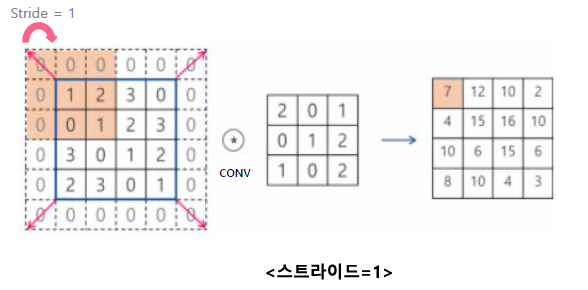

In [252]:
src = np.array([[1,2,3,0],[0,1,2,3],[3,0,1,2], [2,3,0,1]])
kernel = np.array([[2,0,1],[0,1,2],[1,0,2]]) 
a = convolution_natural(src, 1, kernel)

[[ 7. 12. 10.  2.]
 [ 4. 15. 16. 10.]
 [10.  6. 15.  6.]
 [ 8. 10.  4.  3.]]


In [138]:
### opencv로 구현 ### : 대신에 down sizing은 수작업,  stride는 구현안됨, 음수는 표현안됨

import sys
import numpy as np
import cv2



## source ##
src1 = np.array([[1,1,1],[2,1,2],[0,1,0]])
src1 = cv2.copyMakeBorder(src1,  1, 1, 1, 1, borderType =None)   ## padding 
src1 = src1.astype(np.uint16)  ## opencv 활용하려면 uint8 타입으로 변경해줘야함

# src2 = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)
# print(type(src2))
# print(src2)
# print(src2.dtype)


### 컨벌루션 적용 ###
kernel1 = np.array([[0,0,0],[0,0,1],[0,1,0]]) 
kernel1 = kernel1.astype(np.float64)   ## 커널(필터)는 실수형으로 변환 필요
# kernel = np.ones((3, 3), dtype=np.float64) / 9.0   

dst1 = cv2.filter2D(src1, -1, kernel1)

print(src1, dst1, sep='\n\n')


[[0 0 0 0 0]
 [0 1 1 1 0]
 [0 2 1 2 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]

[[0 1 1 1 0]
 [1 3 2 2 1]
 [2 1 3 0 2]
 [0 1 0 0 0]
 [0 0 1 0 0]]


In [173]:

def convolution(src, padding_size, kernel  ):
    ## padding ## 

    if padding_size >=1:
        src = cv2.copyMakeBorder(src,padding_size, padding_size,padding_size,padding_size,cv2.BORDER_CONSTANT)
        
    src = src.astype(np.uint16)   ## opencv 활용하려면 uint8 타입으로 변경해줘야함

    # src2 = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)
    # print(type(src2))
    # print(src2)
    # print(src2.dtype)


    ### 컨벌루션 적용 ###
    kernel = kernel.astype(np.float64)   ## 커널(필터)는 실수형으로 변환 필요
    # kernel = np.ones((3, 3), dtype=np.float64) / 9.0   

    dst = cv2.filter2D(src, -1, kernel)
    dst = dst.astype(np.int32)
    print(src, dst, sep='\n\n')
    
    ## down size가 안되서 수작업.....(필터를 쪼개라서도 적용하는 openCV 사마..)
    dst = np.delete(dst, 0,axis =0 )
    dst = np.delete(dst, -1,axis =0 )
    dst = np.delete(dst, 0,axis =1 )
    dst = np.delete(dst, -1,axis =1 )       
        
    
    return dst



src = np.array([[1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1]])
kernel = np.array([[2,0,1],[0,1,2],[1,0,2]]) 


convolution(src, 1, kernel)  ### 결과값은 양끝단을 제외하고 확인


    

[[0 0 0 0 0 0]
 [0 1 2 3 0 0]
 [0 0 1 2 3 0]
 [0 3 0 1 2 0]
 [0 2 3 0 1 0]
 [0 0 0 0 0 0]]

[[ 6  6 12  6  9  0]
 [ 2  7 12 10  2  9]
 [12  4 15 16 10 12]
 [12 10  6 15  6 16]
 [13  8 10  4  3  8]
 [12  9  6 12  0  6]]


array([[ 7, 12, 10,  2],
       [ 4, 15, 16, 10],
       [10,  6, 15,  6],
       [ 8, 10,  4,  3]])

# 4-7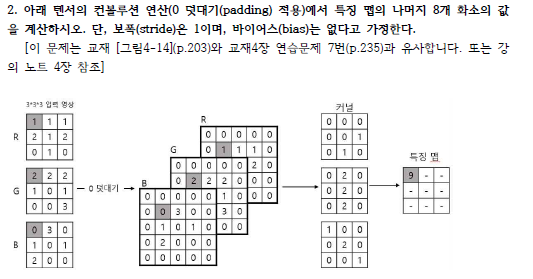

In [145]:
### 3채널 연산 - 4-7번 ###

src = np.array([[1,1,1],[2,1,2],[0,1,0]])
kernel = np.array([[0,0,0],[0,0,1],[0,1,0]]) 
a = convolution_cv(src, 1, kernel)

src = np.array([[2,2,2],[1,0,1],[0,0,3]])
kernel = np.array([[0,2,0],[0,2,0],[0,2,0]]) 
b = convolution_cv(src, 1, kernel)

src = np.array([[0,3,0],[1,0,1],[2,0,0]])
kernel = np.array([[1,0,0],[0,2,0],[0,0,1]]) 
c = convolution_cv(src, 1, kernel)

a+b+c

[[0 0 0 0 0]
 [0 1 1 1 0]
 [0 2 1 2 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]

[[0 1 1 1 0]
 [1 3 2 2 1]
 [2 1 3 0 2]
 [0 1 0 0 0]
 [0 0 1 0 0]]
[[0 0 0 0 0]
 [0 2 2 2 0]
 [0 1 0 1 0]
 [0 0 0 3 0]
 [0 0 0 0 0]]

[[ 0  8  8  8  0]
 [ 0  6  4  6  0]
 [ 0  6  4 12  0]
 [ 0  2  0  8  0]
 [ 0  0  0 12  0]]
[[0 0 0 0 0]
 [0 0 3 0 0]
 [0 1 0 1 0]
 [0 2 0 0 0]
 [0 0 0 0 0]]

[[0 3 0 3 0]
 [1 0 7 0 1]
 [2 2 0 5 0]
 [1 4 1 0 1]
 [4 0 2 0 0]]


array([[ 9, 13,  8],
       [ 9,  7, 17],
       [ 7,  1,  8]])

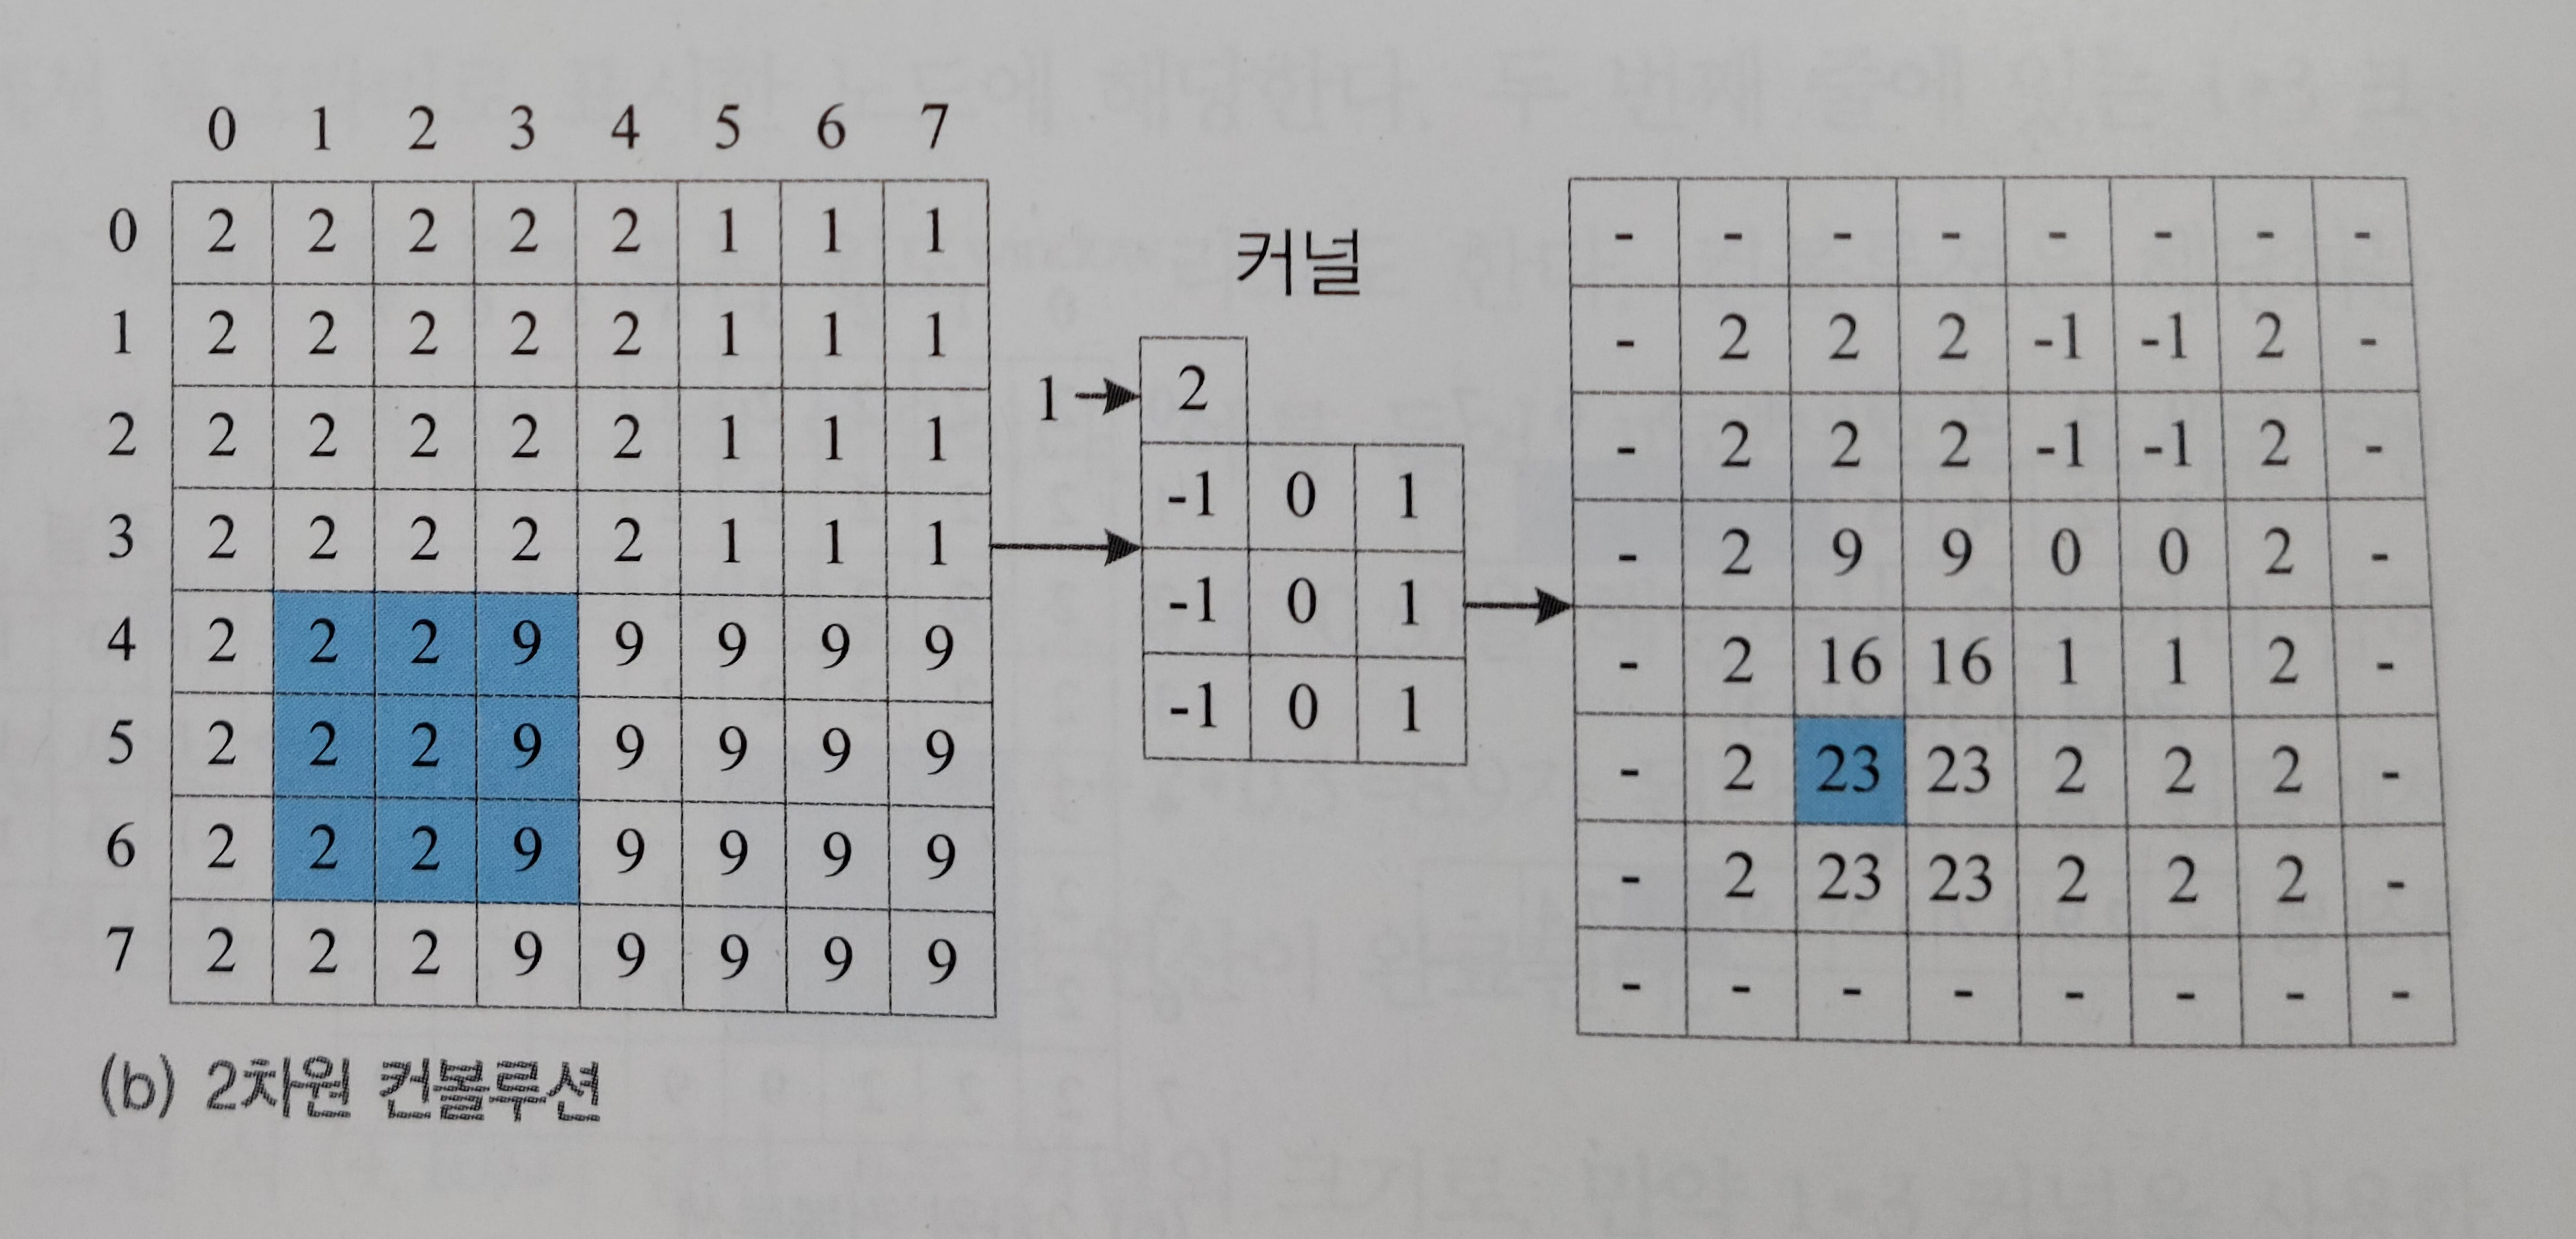

In [146]:
### 3채널 연산 - 위 그림 ###
# 위 그림에 대해 실제 계산해보자.


src = np.array([[2,2,2,2,2,1,1,1],[2,2,2,2,2,1,1,1],[2,2,2,2,2,1,1,1], [2,2,2,2,2,1,1,1],
                [2,2,2,9,9,9,9,9], [2,2,2,9,9,9,9,9], [2,2,2,9,9,9,9,9], [2,2,2,9,9,9,9,9]])
kernel = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) 

a = convolution_cv(src, 0, kernel) + 2  ## 패딩 없음 : 0,  2는 bias

a  ## 결과값 : 음수 표현안되어 ,결과값이 다름

[[2 2 2 2 2 1 1 1]
 [2 2 2 2 2 1 1 1]
 [2 2 2 2 2 1 1 1]
 [2 2 2 2 2 1 1 1]
 [2 2 2 9 9 9 9 9]
 [2 2 2 9 9 9 9 9]
 [2 2 2 9 9 9 9 9]
 [2 2 2 9 9 9 9 9]]

[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  7  7  0  0  0  0]
 [ 0  0 14 14  0  0  0  0]
 [ 0  0 21 21  0  0  0  0]
 [ 0  0 21 21  0  0  0  0]
 [ 0  0 21 21  0  0  0  0]]


array([[ 2,  2,  2,  2,  2,  2],
       [ 2,  2,  2,  2,  2,  2],
       [ 2,  9,  9,  2,  2,  2],
       [ 2, 16, 16,  2,  2,  2],
       [ 2, 23, 23,  2,  2,  2],
       [ 2, 23, 23,  2,  2,  2]])

In [125]:
### 3채널 연산 - 4-8번 ###
# 위 그림에 대해 [[-1,0,1],[-1,0,1],[-1,0,1]]로 필터를 바꾸어 적용해보자.


src = np.array([[2,2,2,2,2,1,1,1],[2,2,2,2,2,1,1,1],[2,2,2,2,2,1,1,1], [2,2,2,2,2,1,1,1],
                [2,2,2,9,9,9,9,9], [2,2,2,9,9,9,9,9], [2,2,2,9,9,9,9,9], [2,2,2,9,9,9,9,9]])
kernel = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) 

a = convolution(src, 1, kernel) + 2  ## 0,5는 bias
a

[[0 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 1 1 1 0]
 [0 2 2 2 2 2 1 1 1 0]
 [0 2 2 2 2 2 1 1 1 0]
 [0 2 2 2 2 2 1 1 1 0]
 [0 2 2 2 9 9 9 9 9 0]
 [0 2 2 2 9 9 9 9 9 0]
 [0 2 2 2 9 9 9 9 9 0]
 [0 2 2 2 9 9 9 9 9 0]
 [0 0 0 0 0 0 0 0 0 0]]

[[ 0  4  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0]
 [ 0  6  0  7  7  0  0  0  0  0]
 [ 0  6  0 14 14  0  0  0  0  0]
 [ 0  6  0 21 21  0  0  0  0  0]
 [ 0  6  0 21 21  0  0  0  0  0]
 [ 0  4  0 14 14  0  0  0  0  0]
 [ 0  4  0 14 14  0  0  0  0  0]]


array([[ 6,  2,  2,  2,  2,  2,  2,  2],
       [ 8,  2,  2,  2,  2,  2,  2,  2],
       [ 8,  2,  2,  2,  2,  2,  2,  2],
       [ 8,  2,  9,  9,  2,  2,  2,  2],
       [ 8,  2, 16, 16,  2,  2,  2,  2],
       [ 8,  2, 23, 23,  2,  2,  2,  2],
       [ 8,  2, 23, 23,  2,  2,  2,  2],
       [ 6,  2, 16, 16,  2,  2,  2,  2]], dtype=uint8)

In [107]:
# ???

# def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
#     N, C, H, W = input_data.shape
#     out_h = (H + 2*pad - filter_h)//stride + 1
#     out_w = (W + 2*pad - filter_w)//stride + 1

#     img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
#     col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

#     for y in range(filter_h):
#         y_max = y + stride*out_h
#         for x in range(filter_w):
#             x_max = x + stride*out_w
#             col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

#     col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
#     return col


# class Convolution2:
#     def __init__(self, W, b, stride=1, pad=0):
#         self.W = W
#         self.b = b
#         self.stride = stride
#         self.pad = pad

#     def forward(self, x):
#         FN, C, FH, FW = self.W.shape
#         N, C, H, W = x.shape
#         out_h = int(1 + (H + 2 * self.pad - FH) / self.stride)
#         out_w = int(1 + (W + 2 * self.pad - FW) / self.stride)

#         col = im2col(x, FH, FW, self.stride, self.pad)
#         col_W = self.W.reshape(FN, -1).T    # 변환 후에도 원소 수가 똑같이 유지된다.
#         out = np.dot(col, col_W) + self.b

#         out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

#         return out
    
# x = np.array([[[[1,1,1], [2,1,2], [0,1,0]], [[2,2,2], [1,0,1], [0,0,3]], [[0,3,0], [1,0,1], [2,0,0]]]])
# a = Convolution2().forward(x)
    
    

TypeError: __init__() missing 2 required positional arguments: 'W' and 'b'

# Pooling

In [26]:
class MaxPooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad

    def forward(self, x):
#         FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)
        
        col = x
#         col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col_W = col.reshape(-1, self.pool_h * self.pool_w)

        out = np.max(col, axis=1)

        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        return out


In [27]:
x = np.array([[[[1,2,1,0], [0,1,2,3], [3,0,1,2], [2,4,0,1]]]])  ## 4차원으로 입력

MaxPooling(2,2,2,0).forward(x)

array([[[[1, 0],
         [3, 2]],

        [[2, 1],
         [0, 4]],

        [[1, 2],
         [1, 0]],

        [[0, 3],
         [2, 1]]]])

In [17]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col

In [20]:
input_data = np.random.rand(1,3,7,7)
im2col(input_data, 5, 5, 1, 0).shape

(9, 75)

In [23]:
x = np.array([[[[1,2,1,0], [0,1,2,3], [3,0,1,2], [2,4,0,1]]]])  ## 4차원으로 입력
im2col(x, 3, 3, 1, 0).shape

(4, 9)